# Topological Entropy

In [1]:
%pip install nolds

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 1.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install wfdb

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 380.2 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 129.7 kB/s eta 0:00:0000:0200:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 360.9 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 772.9 kB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 556.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 786.5 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


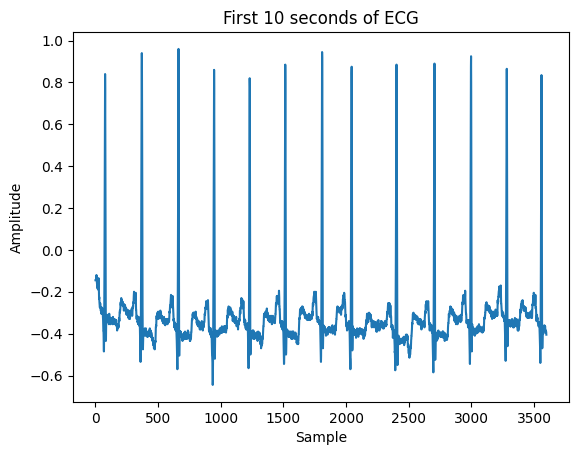

In [6]:
import wfdb
import matplotlib.pyplot as plt

record  = wfdb.rdrecord('100', pn_dir='mitdb')
ecg = record.p_signal[:,0]
fs = record.fs  # sampling frequency
samples_10s = int(fs * 10)
plt.plot(ecg[:samples_10s])
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('First 10 seconds of ECG')
plt.show()

In [8]:
%pip install numpy==2.2.0 --quiet

Note: you may need to restart the kernel to use updated packages.


In [10]:
!wget -r -N -c -np https://physionet.org/files/afpdb/1.0.0/

--2025-07-08 09:56:31--  https://physionet.org/files/afpdb/1.0.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘physionet.org/files/afpdb/1.0.0/index.html’

physionet.org/files     [   <=>              ]  99.51K   119KB/s    in 0.8s    

Last-modified header missing -- time-stamps turned off.
2025-07-08 09:56:33 (119 KB/s) - ‘physionet.org/files/afpdb/1.0.0/index.html’ saved [101895]

Loading robots.txt; please ignore errors.
--2025-07-08 09:56:33--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 22 [text/plain]
Saving to: ‘physionet.org/robots.txt’

physionet.org/robot 100%[===================>]      22  --.-KB/s    in 0s      

2025-07-08 09:56:34 (10.5 MB/s) - ‘physionet.org/robots.txt’ saved [22/22]

--2025-07-08 09:56:3

In [7]:

import antropy as ant
import nolds

segment =  ecg[:7200]  
tolerance = 0.2
tolerance = float(tolerance)
nold_sample_entropy = nolds.sampen(segment)
print(f'Nolds sample entropy: {nold_sample_entropy}')
# Two sequences are considered similar if all corresponding values differ by less than 0.2 × std(segment)
nolds_sample_entropy_tolerance = nolds.sampen(segment, emb_dim=2, tolerance=0.2)
print(f'Nolds sample entropy with tolerance: {nolds_sample_entropy_tolerance}')
# Sample entropy- order(embedding)- Chebyshev metric(Maximum norm)
chebyshev_sample_entropy = ant.entropy.sample_entropy(segment)
print(f'Chebyshev sample entropy: {chebyshev_sample_entropy}')


Nolds sample entropy: 0.17972083614427178
Nolds sample entropy with tolerance: 0.015085837970873647
Chebyshev sample entropy: 0.17972083614427165


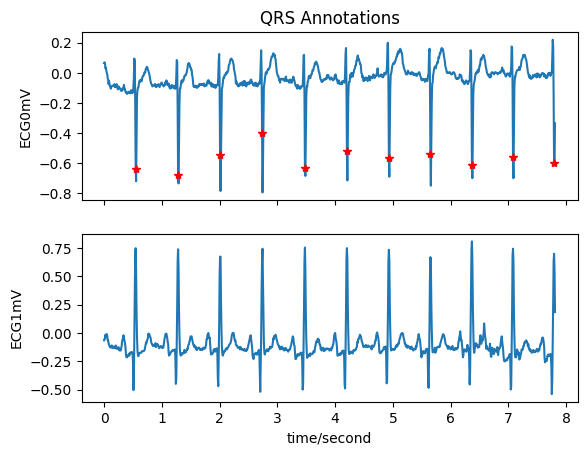

Nolds sample entropy: 0.17972083614427178


In [ ]:
record_name = '/Users/weijithwimalasiri/Desktop/JustForFun/RPS/physionet.org/files/afpdb/1.0.0/p31'
record = wfdb.rdrecord(record_name, sampfrom=4000, sampto=5000,)
annotation = wfdb.rdann(record_name, 'qrs', sampfrom=4000, sampto=5000,shift_samps=True)
wfdb.plot_wfdb(record, annotation=annotation,    title='QRS Annotations', time_units='seconds')
nold_sample_entropy = nolds.sampen(segment)
print(f'Nolds sample entropy: {nold_sample_entropy}')

In [22]:
print(type(segment))

<class 'numpy.ndarray'>



if isinstance(segment, np.ndarray):
    print("dtype:", segment.dtype)
    print("shape:", segment.shape)

In [ ]:
import numpy as np
if isinstance(segment, np.ndarray):
    print("dtype:", segment.dtype)
    print("shape:", segment.shape)

dtype: float64
shape: (3600,)
